# Non-uniform discrete Fourier transform
So I'm trying out how it is to calculate the NDFT:
$$
  P(k_m)=\frac{1}{\sqrt{N}}\sum_{n=1}^Np(x_n)\exp{\{-2\pi ix_nk_m\}}
$$
Where $x_n$ is some un-uniform over an interval $X=\sum_nx_n$. We sample
uniformly in Fourierspace, s.t. $k_n=n/X$.

In [107]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

def ft(x_n, p_n):
  X = sum(x_n)
  k_m = np.linspace(-len(x_n)/2, len(x_n)/2, len(x_n)) / X
  
  kernel = 

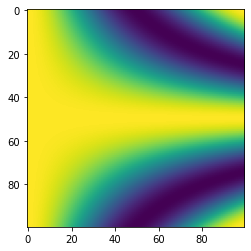

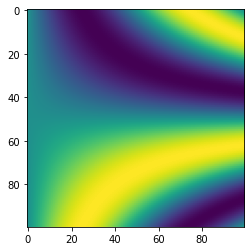

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


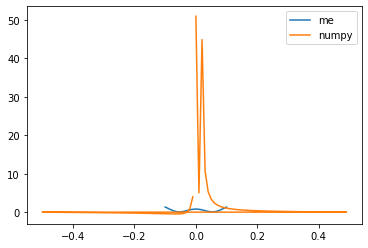

In [108]:
#let's test the custom Fourier transform
x_n = np.linspace(0,10,100)
p_n = np.sin(x_n)

k_m, P_m = ft(x_n, p_n)
k_np, P_np = np.fft.fftfreq(len(x_n), 1), np.fft.fft(P_m)

plt.plot(k_m, P_m, label='me')
plt.plot(k_np, P_np, label='numpy')
plt.legend()
plt.show()

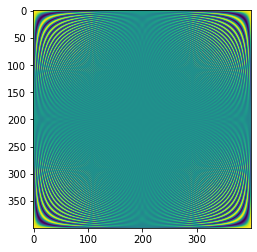

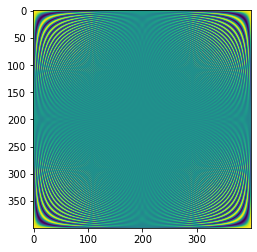

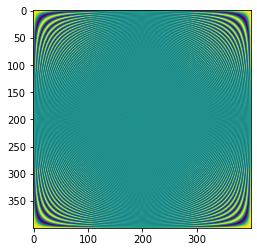

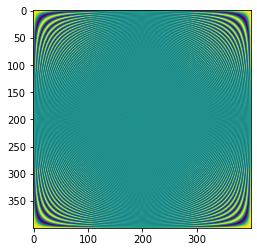

In [160]:
#number of samples
N = 400
n = np.arange(N)

#time samples
T = 1 #s
t = np.linspace(0, T, N)

def normal_kernel():
  return np.exp(2.j*np.pi*(np.outer(n,n) % N)/N)

def general_kernel(x):
  N = len(x)
  X = np.max(x)
  k = np.arange(N) / X
  return np.exp(2.j*np.pi*(np.outer(k,x) % N))

def most_general_kernel(x, k):
  N = len(x)
  assert(len(x) == len(k))
  return np.exp(2.j*np.pi*(np.outer(k,x) % N))
  
#kernel
omega = np.exp(2.j*np.pi/N)
working_kernel = omega**(np.outer(n,n) % N)
maybe_kernel = normal_kernel()

plt.figure()
plt.imshow(np.real(working_kernel))
plt.figure()
plt.imshow(np.real(maybe_kernel))
plt.figure()
plt.imshow(np.real(general_kernel(t)))
plt.figure()
plt.imshow(np.real(most_general_kernel(t, np.arange(N)/T)))

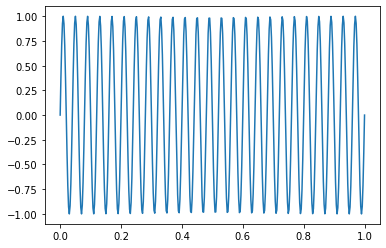

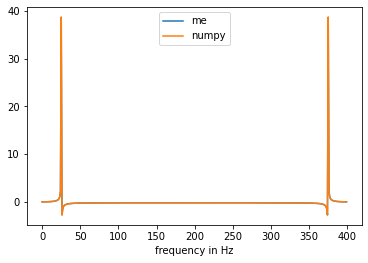

In [169]:
#testen met de general kernal in een echte fourier transform

omega = 25 #Hz
TIME = np.sin(2*np.pi*t * omega)

plt.figure()
plt.plot(t, TIME)

FREQ = working_kernel @ TIME
f = np.arange(N) / T

plt.figure()
plt.plot(f, np.real(FREQ), label='me')
plt.plot(f, np.real(np.fft.fft(TIME)), label='numpy')
plt.xlabel("frequency in Hz")
plt.legend()

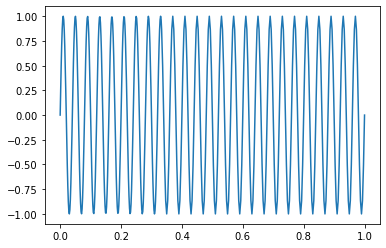

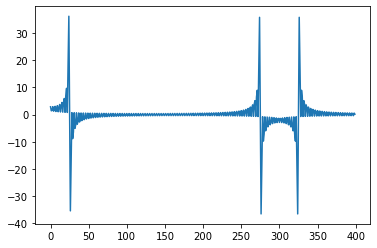

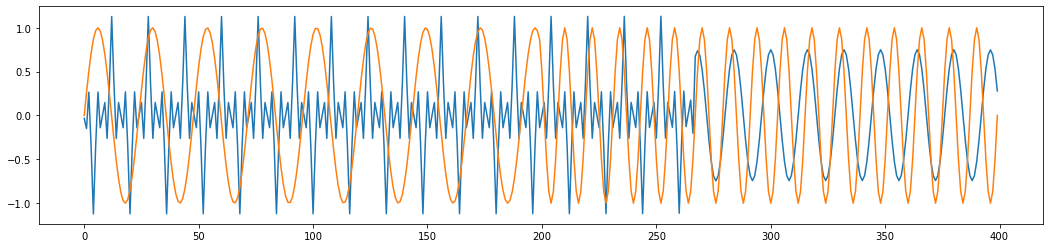

In [179]:
#tijd voor een test met oneven samples

#number of samples
N = 400
n = np.arange(N)

#time samples
T = 1 #s
t = np.concatenate((
  np.linspace(0, T/3, N//2), #eerste derde der tijd heeft fijnere samples
  np.linspace(T/3, T, N//2 + 1)[1:] #..dan de laatste twee derde
))

#we samplen uniform in fourier-space though, dus
w = np.arange(N) / T

#de functie wordt een sinus, zoals voorheen
omega = 25 #Hz
TIME = np.sin(2*np.pi*t * omega)

plt.figure()
plt.plot(t, TIME)

#dan fourier transformeren we met mijn pretty kernel
FREQ = most_general_kernel(t,w) @ TIME

plt.figure()
plt.plot(w, np.real(FREQ))

plt.figure(figsize=(18,4))
plt.plot(np.fft.ifft(FREQ))
plt.plot(TIME)